# R1

Github repo: [`github.com/christoffer-s/notebooks`](https://github.com/christoffer-s/notebooks) 

Branch: revert-1-main

<br>
<br/>



> Det eneste jeg savner er resten 
>
> \- Carmen

---

## Innholdsfortegnelse
[Grenseverdier](#grenseverdier)

[Gjennomsnitt](#gjennomsnitt)

[Andregradsfunksjon](#andregradsfunksjon)

## Grenseverdier

---

In [6]:
def f(x):
    return (x**2 - 4*x - 12) / (x - 6)

a = float(input("Skriv a verdien: "))
nøyaktighet = 0.00000001
pres = 6


print(f"Øvre grenseverdi: f({round(a - nøyaktighet, pres)}) = {round(f(a - nøyaktighet), pres)}")
print(f"Nedre grenseverdi: f({round(a + nøyaktighet, pres)}) = {round(f(a + nøyaktighet), pres)}")

Øvre grenseverdi: f(6.0) = 8.0
Nedre grenseverdi: f(6.0) = 8.0


In [13]:
from numpy import log10

def f(x):
    return (x**2 - 4*x - 12) / (x - 6)

a = float(input("Skriv a verdien: "))

nøyaktighet = 0.0000000001
pres = int(abs(log10(nøyaktighet)) - 1)

x_øvre, x_nedre = a + nøyaktighet, a - nøyaktighet
y_øvre, y_nedre = round(f(x_øvre), pres), round(f(x_nedre), pres)

if y_øvre == y_nedre:
    print(f"Grenseverdien for f({round(x_øvre, pres)}) = {y_øvre}")

else:
    print(f"Øvre grenseverdi: f({round(x_øvre, pres)}) = {y_øvre}")
    print(f"Nedre grenseverdi: f({round(x_nedre, pres)}) = {y_nedre}")

Grenseverdien for f(6.0) = 8.0


## Gjennomsnitt

---

In [14]:
def avg(x, pres):
    return round(sum(x) / len(x), pres)


liste = [3, 4, 5, 6, 7, 2, 2, 2]

avg(liste, 3)

3.875

In [ ]:
pres = 3
nums = []

while True:
    try:
        val = input(f"Tall som er i listen: {*nums,}\nSkriv inn tall: ")
        val = float(val)
        nums.append(val)

    except ValueError:
        if val == " ":
            avg = round(sum(nums) / len(nums), pres)
            break

        else:
            print("Skriv et tall eller mellomrom for å avslutte")
            continue

    except Exception as e:
        print("Error", e)
        avg = None
        break

print(f"Gjennomsnittet av: {', '.join(str(x) for x in nums)} = {avg} ")

## Andregradsfunksjon

---

In [5]:
#   #   #   #   #   #   #   #   #   #   #   #   #
#                                               #
#    Legge til grafing av f'(x)                 #
#                                               #
#    Bedre UI for svar og grafing               #
#                                               #
#   #   #   #   #   #   #   #   #   #   #   #   #

from matplotlib import pyplot as plt
from numpy import linspace, sqrt


class andregradsfunksjon():
    ''' A class to analyse second degree polynomial functions. Expected form: f(x) = ax^2+bx+c'''  

    def __init__(self, uttrykk):
        self.uttrykk = uttrykk
        self.navn, self.a, self.b, self.c = self.formatering()


    def formatering(self):
        uttrykk = self.uttrykk
        index = 0
        
        for i, letter in enumerate(uttrykk):
            if letter == "=":
                navn = uttrykk[0:i - 1]
                a_index = i + 2
                
            elif letter == "+" or letter == "-":
                if not index and i != a_index:
                    b_index = i
                    index = 1

                elif index:
                    c_index = i
                    break
        
        a = float(self.uttrykk[a_index:b_index - 3])
        b = float(self.uttrykk[b_index:c_index - 1])
        c = float(self.uttrykk[c_index:])
        
        return navn, a, b, c


    def funksjon_uttrykk(self):
        return self.uttrykk


    def funksjon_punkt(self, x):
        return self.a*x**2 + self.b*x + self.c


    def funksjon_nullpunkter(self):
        a = self.a
        b = self.b
        c = self.c

        if (b**2) - (4*a*c) >= 0:
            rot = sqrt((b**2) - (4*a*c))
            
            x1 = (-b - rot) / (2*a)
            x2 = (-b + rot) / (2*a)

        else:
            x1 = None
            x2 = None

        return x1, x2


    def ekstremalpunkt(self):
        x = (-self.b) / (2 * self.a)
        return x, self.funksjon_punkt(x)


    def derivert(self):
        uttrykk = self.uttrykk
        
        for i, letter in enumerate(uttrykk):
            if letter == "(":
                temp_navn = uttrykk[0:i] + "'" + uttrykk[i:i + 3] 
                return f"{temp_navn} = {2*self.a}x + {self.b}"
                
        else:
            return None


    def derivert_punkt(self, x):
        return (2 * self.a * x) + self.b

    
    def funksjon_graf(self, x_start, x_stopp):
        x = linspace(x_start, x_stopp)
        plt.grid()
        plt.plot(x, self.funksjon_punkt(x), label = self.funksjon_uttrykk())
        plt.legend()     
        plt.show()

        

f(x) = 1x^2+4x+4
f'(x) = 2.0x + 4.0
25.0
10.0
(-2.0, -2.0)
(-2.0, 0.0)


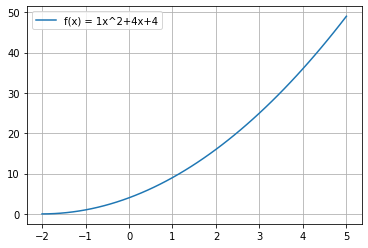

In [9]:
f = andregradsfunksjon("f(x) = 1x^2+4x+4")
print(f.funksjon_uttrykk())
print(f.derivert())
print(f.funksjon_punkt(3))
print(f.derivert_punkt(3))
print(f.funksjon_nullpunkter())
print(f.ekstremalpunkt())
f.funksjon_graf(-2, 5)

In [12]:
num = 25

num1 = num ** 0.5
num2 = num ** (1/3)

if num1.is_integer():
    print("tallet er et kvadrattall")

elif num2.is_integer():
    print("tallet er et kubetall")

else:
    print("tallet er ingen av delene")


tallet er et kvadrattall
